# Search for the order Scleractinia and extract all records below.

In [1]:
import json
from urllib.request import urlopen
import pandas as pd

Searching the order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363) and drill down to all species. 

**AphiaID** 1363  (urn:lsid:marinespecies.org:taxname:1363) 

Collect all the AphiaIDs for the families associated with [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363)

The service only provides 50 records, so we need to iterate by 50 until we get less than 50 responses

Need to follow the Taxonomy Classification from order down:
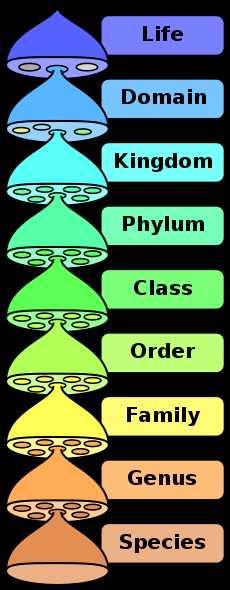

In [2]:
# Use WoRMS REST service
# https://www.marinespecies.org/rest/ and test for one search

# base = 'https://www.marinespecies.org/rest/'

# orderID = '1363'

# family_childs = 'AphiaChildrenByAphiaID/{}'.format(orderID) # get all children

# offset = 1 # Starting recordnumber, when retrieving next chunk of (50) records. Default=1

# worms_url = '{}{}?marine_only=true&offset={}'.format(base,family_childs,offset)

# worms_url



# worms_df = pd.DataFrame()

# for i in range(1,100000,50):
#     offset = i
#     worms_url = '{}{}?marine_only=true&offset={}'.format(base,family_childs,offset)
#     response = urlopen(worms_url)
#     data_json = json.loads(response.read())
#     worms_df = pd.concat([worms_df,pd.DataFrame(data_json)])
#     if len(data_json) < 50:
#         break

        
# worms_df = worms_df[worms_df['rank']=='Family']    # only use family 

# worms_df.shape

Collect all the genuses associated with the family collected above.

In [3]:
# for aphia in worms_df['AphiaID'].unique():
#     for i in range(1,100000,50):
#         offset = i
#         worms_url = '{}{}?marine_only=true&offset={}'.format(base,aphia,offset)
#         try:
#             response = urlopen(worms_url)
#             data_json = json.loads(response.read())
#             worms_df = pd.concat([worms_df,pd.DataFrame(data_json)])
#             if len(data_json) < 50:
#                 break
#         except:
#             continue
# worms_df.shape

Now look for each aphia ID in OBIS and build a mongo data frame.

In [4]:
# base = 'https://api.obis.org/v3/'

# data = pd.DataFrame()

# for aphiaID in worms_df['AphiaID']:

#     occurrence_id = 'occurrence?taxonid={}'.format(aphiaID)
#     url = '{}{}'.format(base,occurrence_id)
#     response= urlopen(url)
#     data_json = json.loads(response.read())
#     data_json['results']
#     data = pd.concat([data, pd.DataFrame(data_json['results'])])
#     #data.head()

# data.describe()

Turns out we can simply search OBIS using the AphiaID for the order Scleractinia and it will return all appropriate records.

Let's replicate this response from OBIS mapper https://mapper.obis.org/?taxonid=1363#

To do:
* figure out years
* figure out species
* figure out taxa

In [5]:
import json
from urllib.request import urlopen
import pandas as pd

base = 'https://api.obis.org/v3/'

aphiaID = '1363'
size = 1

occurrence_id = 'occurrence?taxonid={}&size={}'.format(aphiaID,size)
url = '{}{}'.format(base,occurrence_id)
response= urlopen(url)
data_json = json.loads(response.read())
size = data_json['total']

data = pd.DataFrame() # initialize df

# build a list of the subset of fields you want back
fields = ['decimalLatitude','decimalLongitude','occurrenceID','id',
          'datasetName','dataset_id','eventDate','species','aphiaID',
          'date_year']

f = "%2C".join([f"{v}" for v in fields])

# The API limits responses to 10,000 entries, so we need to iterate by 10k and use the last occurrence
# uuid to set after "Occurrence UUID up to which to skip."
for i in range(10000,size,10000):
    if i == 10000:
        # build url for first call
        occurrence_id = 'occurrence?taxonid={}&fields={}&size=10000'.format(aphiaID,f)
    else:
        # build url for remaining calls
        uuid = data.iloc[-1]['id']
        occurrence_id = 'occurrence?taxonid={}&fields={}&after={}&size=10000'.format(aphiaID,f,uuid)
        
    url = '{}{}'.format(base,occurrence_id)
    # open the api call
    response= urlopen(url) 
    # read in the json
    data_json = json.loads(response.read())
    # build a mongo dataframe with all results
    data = pd.concat([data, pd.DataFrame(data_json['results'])])
    
    print(len(data_json['results']),data.shape)
    
    # kick out of loop at the end
    if len(data_json['results']) < 10000:
        break

# Need to grab from last iteration to expected size.
uuid = data.iloc[-1]['id']
occurrence_id = 'occurrence?taxonid={}&fields={}&after={}&size=10000'.format(aphiaID,f,uuid)
url = '{}{}'.format(base,occurrence_id)
response= urlopen(url)
data_json = json.loads(response.read())
data_json['results']
data = pd.concat([data, pd.DataFrame(data_json['results'])])
print(len(data_json['results']),data.shape)        

data.shape

10000 (10000, 10)
10000 (20000, 10)
10000 (30000, 10)
10000 (40000, 10)
10000 (50000, 10)
10000 (60000, 10)
10000 (70000, 10)
10000 (80000, 10)
10000 (90000, 10)
10000 (100000, 10)
10000 (110000, 10)
10000 (120000, 10)
10000 (130000, 10)
10000 (140000, 10)
10000 (150000, 10)
10000 (160000, 10)
10000 (170000, 10)
10000 (180000, 10)
10000 (190000, 10)
10000 (200000, 10)
10000 (210000, 10)
10000 (220000, 10)
10000 (230000, 10)
10000 (240000, 10)
10000 (250000, 10)
10000 (260000, 10)
10000 (270000, 10)
10000 (280000, 10)
10000 (290000, 10)
10000 (300000, 10)
10000 (310000, 10)
10000 (320000, 10)
10000 (330000, 10)
10000 (340000, 10)
10000 (350000, 10)
10000 (360000, 10)
10000 (370000, 10)
10000 (380000, 10)
10000 (390000, 10)
10000 (400000, 10)
10000 (410000, 10)
10000 (420000, 10)
10000 (430000, 10)
10000 (440000, 10)
10000 (450000, 10)
10000 (460000, 10)
10000 (470000, 10)
10000 (480000, 10)
10000 (490000, 10)
10000 (500000, 10)
10000 (510000, 10)
10000 (520000, 10)
10000 (530000, 10)
10

(858524, 10)

In [6]:
print("records:",data.shape[0])
print("Years:",data["date_year"].astype(float).min(),"-",data["date_year"].astype(float).max())
print("Species:", len(data['species'].dropna().unique()))
print("Taxa:", len(data['aphiaID'].dropna().unique()))

records: 858524
Years: 1758.0 - 2021.0
Species: 1848
Taxa: 2094


In [7]:
## Just pulling the coordinates
# base = 'https://api.obis.org/v3/'

# aphiaID = '1363'

# occurrence_points = 'occurrence/points?taxonid={}'.format(aphiaID)
# url = '{}{}'.format(base,occurrence_points)
# response= urlopen(url)
# data_json = json.loads(response.read())
# data = pd.DataFrame(data_json['coordinates'])
# data.shape

Make the histogram of occurrences

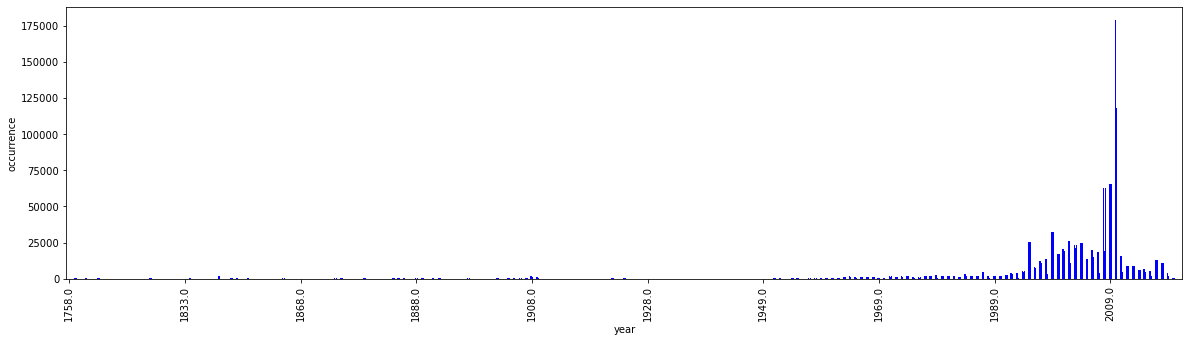

In [16]:
import matplotlib as plt

data['date'] = pd.to_datetime(data['date_year'],format="%Y")

year_group = data.groupby(data['date'].dt.year)

ax = year_group.count().plot(kind="bar", 
                             color='blue',
                             legend=False, 
                             figsize=(20, 5),
                             ylabel='occurrence',
                             xlabel='year',
                            )

ax.xaxis.set_major_locator(plt.ticker.MaxNLocator(10))

What is our maximum occurrence count in one year?

In [10]:
year_group['date_year'].count().max()

179161

This jives with the OBIS mapper!

Now create a gridded occurrence map. Using the example at https://james-brennan.github.io/posts/fast_gridding_geopandas/

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


(-18622655.942937493, 18668427.54594274, -8912717.485405901, 8912717.485405901)

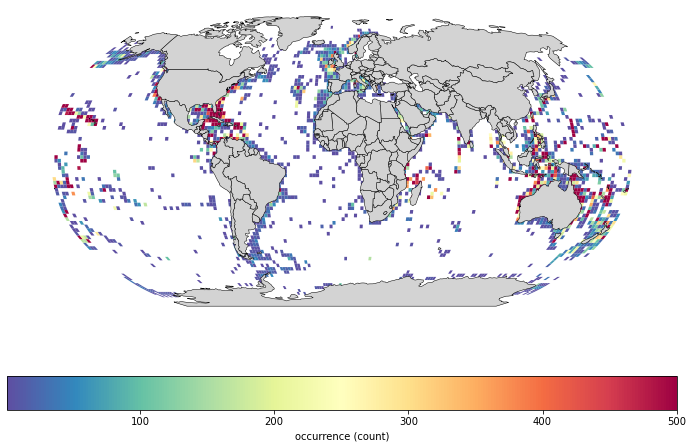

In [13]:
import numpy as np
import shapely
import matplotlib.pyplot as plt
import geoplot
import geopandas as gpd
import pycrs

gdf = gpd.GeoDataFrame(data, 
                       geometry=gpd.points_from_xy(data.decimalLongitude, data.decimalLatitude),
                       crs="EPSG:4326",
                      )

# total area for the grid
xmin, ymin, xmax, ymax= [-180., -90., 180., 90] # gdf.total_bounds
# how many cells across and down
n_cells=180
cell_size = (xmax-xmin)/n_cells
# projection of the grid
#crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        
cell = gpd.GeoDataFrame(grid_cells, 
                        columns=['geometry'],
                        crs="EPSG:4326",
                       )
    
# ax = gdf.plot(markersize=.1, figsize=(12, 8),)# column='dob', cmap='jet')
# plt.autoscale(False)
# cell.plot(ax=ax, facecolor="none", edgecolor='grey')
# ax.axis("off")

merged = gpd.sjoin(gdf, cell, how='left', op='within')

# make a simple count variable that we can sum
merged['n_occur'] = 1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_occur'] = dissolve.n_occur.values

# adjust the crs to World Robinson centered closer to the Pacific
# see this page https://github.com/karimbahgat/PyCRS#modifying-the-cs-instance
crs = pycrs.parse.from_esri_code(54030)
#crs.geogcs.prime_mer.value = 160.0
crs_str = crs.to_proj4()

ax = cell.to_crs(crs_str).plot(column='n_occur', 
                               figsize=(12, 8), 
                               cmap='Spectral_r', 
                               vmin=1, 
                               vmax=500, 
                               edgecolor=None, 
                               legend=True,
                               legend_kwds={'label': "occurrence (count)",
                                            'orientation': "horizontal"},
                               )

plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(crs_str).plot(ax=ax, 
                               color='lightgrey', 
                               edgecolor='black',
                               linewidth=.5, 
                               legend=True,
                               legend_kwds={'label': "occurrence (count)",
                                            'orientation': "horizontal"},
                               )
#world.to_crs("ESRI:54009").plot(ax=ax, color='none', edgecolor='black',linewidth=.5)

ax.axis('off')

Now let's look at some statistics on the number of occurrences per cell:

In [14]:
cell['n_occur'].describe()

count     2084.000000
mean       408.280230
std       2103.144522
min          1.000000
25%          4.000000
50%         17.000000
75%         99.250000
max      39013.000000
Name: n_occur, dtype: float64

Try to shift the center of the map to Pacific Ocean.

This is a WIP.

In [ ]:
from shapely.geometry import LineString
from shapely.ops import split
from shapely.affinity import translate
import geopandas



def shift_map(shift):
    shift -= 180
    moved_map = []
    splitted_map = []
    border = LineString([(shift,90),(shift,-90)])
    for row in cell["geometry"]:
        splitted_map.append(split(row, border))
    for element in splitted_map:
        items = list(element)
        for item in items:
            minx, miny, maxx, maxy = item.bounds
            if minx >= shift:
                moved_map.append(translate(item, xoff=-180-shift))
            else:
                moved_map.append(translate(item, xoff=180-shift))
    gdf_shift = geopandas.GeoDataFrame({"geometry":moved_map})
    fig, ax = plt.subplots(figsize=(12, 8))
    gdf_shift.plot(ax=ax)
    plt.show()
    
shift_map(0)